In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
from scipy import fftpack

# Standard MEM Input files with 39 years of data
I only did this for the whole area average. You will likely need to change paths depending on where you put this notebook.

In [2]:
dfw = pd.read_csv('../SEM-1.2_CIW/Input_Data/Lei_Solar_Wind/US_capacity_wind_CONUS_unnormalized.csv', header=5)
dfs = pd.read_csv('../SEM-1.2_CIW/Input_Data/Lei_Solar_Wind/US_capacity_solar_CONUS_unnormalized.csv', header=5)
print(dfw.head())
print(dfs.head())

   Year  Month  Day  Hour  wind CONUS
0  1980      1    1     1    0.168730
1  1980      1    1     2    0.172693
2  1980      1    1     3    0.178793
3  1980      1    1     4    0.186865
4  1980      1    1     5    0.194962
   Year  Month  Day  Hour  solar CONUS
0  1980      1    1     1      0.00025
1  1980      1    1     2      0.00000
2  1980      1    1     3      0.00000
3  1980      1    1     4      0.00000
4  1980      1    1     5      0.00000


# Scipy Documentation
Using Continuous Wavelet Transform: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html
with their default wavelet, `Ricker`

## Wavelet of choice
`Ricker`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.ricker.html#scipy.signal.ricker
The `width` parameter approximately corresponds to 1/4 the width of a full "cycle". As in, a width of 6 will resolve the daily cycles, while a width of 8,760/4 = 2,190 will resolve annual cycles. Widths values are in units of data entries, so hours for us.

100


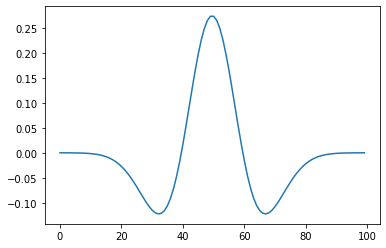

In [3]:
# Simple wavelet plot with width of 10. The positive portion is width 20, negative is broader, but lesser in magnitude
points = 100
a = 10.0
vec2 = signal.ricker(points, a)
print(len(vec2))
plt.plot(vec2)
plt.show()

# Example wavelet - daily cycle
The widths input parameter tells the cwt() which widths to use for the wavelets. This example uses widths of 1 through 15, to show that the daily cycle is best resolved at ~ a width of 6 values.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
(15, 348432)


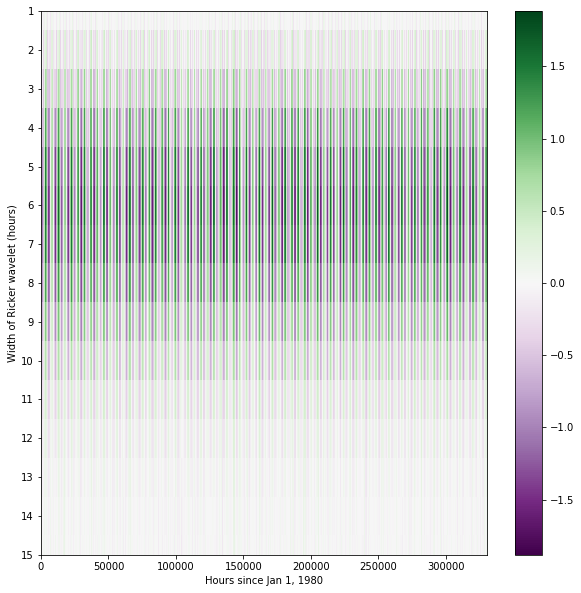

In [4]:
widths = np.arange(1, 16, 1)
print(widths)
cwtmatr = signal.cwt(dfs['solar CONUS'], signal.ricker, widths)
print(cwtmatr.shape)

# This trims the initial and final values to remove edge effects
y = 8760
n = 1
small=cwtmatr[:, y*n:len(dfs['solar CONUS'])-(y*n)]

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(small, cmap='PRGn', aspect='auto',
           vmax=abs(small).max(), vmin=-abs(small).max())
cbar = ax.figure.colorbar(im)

ax.set_xlabel('Hours since Jan 1, 1980')
ax.set_ylabel('Width of Ricker wavelet (hours)')
plt.yticks(range(len(widths)), widths)
plt.show()

# Example wavelet - annual cycle
The widths input parameter tells the cwt() which widths to use for the wavelets. This example uses widths of 8,760/80, to show that the annual cycle is best resolved at width of 1/4 a year.

[ 109  218  327  436  545  654  763  872  981 1090 1199 1308 1417 1526
 1635 1744 1853 1962 2071 2180 2289 2398 2507 2616 2725 2834 2943 3052
 3161 3270 3379 3488 3597 3706 3815 3924 4033 4142 4251 4360 4469 4578
 4687 4796 4905 5014 5123 5232 5341 5450 5559 5668 5777 5886 5995 6104
 6213 6322 6431 6540 6649 6758 6867 6976 7085 7194 7303 7412 7521 7630
 7739 7848 7957 8066 8175 8284 8393 8502 8611 8720 8829 8938 9047 9156
 9265 9374 9483 9592]
(88, 348432)


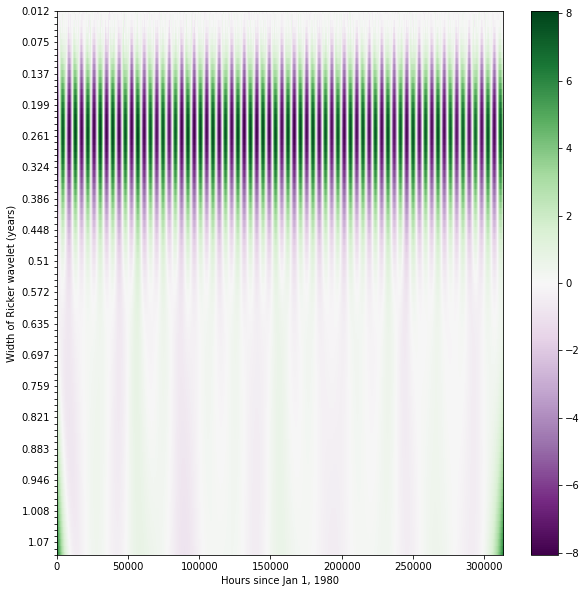

In [5]:
widths = np.arange(int(8760/80), int(8760*1.1), int(8760/80))
print(widths)
cwtmatr = signal.cwt(dfs['solar CONUS'], signal.ricker, widths)
print(cwtmatr.shape)

# This trims the initial and final values to remove edge effects
y = 8760
n = 2
small=cwtmatr[:, y*n:len(dfs['solar CONUS'])-(y*n)]

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(small, cmap='PRGn', aspect='auto',
           vmax=abs(small).max(), vmin=-abs(small).max())
cbar = ax.figure.colorbar(im)

ax.set_xlabel('Hours since Jan 1, 1980')
ax.set_ylabel('Width of Ricker wavelet (years)')
y_labs = []
for i, w in enumerate(widths):
    y_labs.append(f'{round(w/8760,3)}') if i%5==0 else y_labs.append('') 
plt.yticks(range(len(widths)), y_labs)
plt.show()

# Wavelet transform - year+ length cycles (solar)
This time scan lengths of 8760/16 up until edge effect prevent analysis, which occurs at approximately lengths of 3 years. This corresponds to 3 * 4 = 12 year cycles. I have placed a min and max on the heatbat in this figure of -1.5 and 1.5. Compare the magnitude of these fluctuations against the daily and annual cycles above. These are much smaller.

[  547  1095  1642  2190  2737  3285  3832  4380  4927  5475  6022  6570
  7117  7665  8212  8760  9307  9855 10402 10950 11497 12045 12592 13140
 13687 14235 14782 15330 15877 16425 16972 17520 18067 18615 19162 19710
 20257 20805 21352 21900 22447 22995 23542 24090 24637 25185 25732 26280
 26827 27375 27922 28470 29017 29565 30112 30660 31207 31755 32302 32850
 33397 33945 34492 35040 35587 36135 36682 37230 37777 38325 38872 39420
 39967 40515 41062 41610 42157 42705 43252 43800 44347 44895 45442 45990
 46537 47085 47632 48180 48727 49275 49822 50370 50917 51465 52012]
(95, 348432)


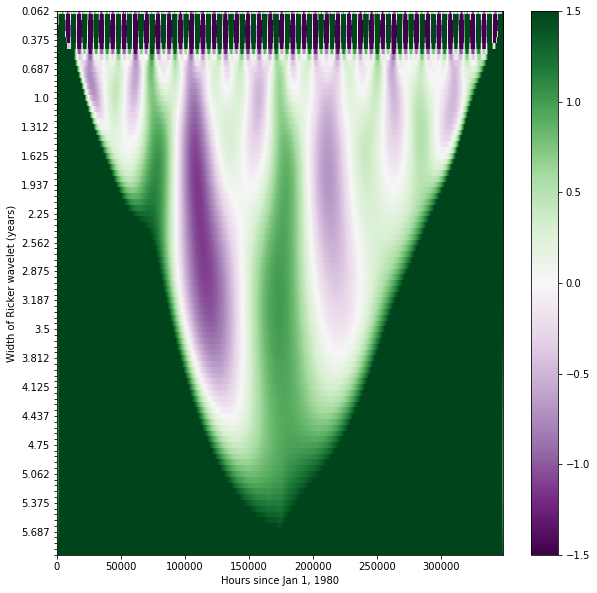

In [6]:
widths = np.array([i*8760//16 for i in range(1, 16*6)])
print(widths)
cwtmatr = signal.cwt(dfs['solar CONUS'], signal.ricker, widths)
print(cwtmatr.shape)

# Don't trim this time, but place a min and max value on heatmap.
small=cwtmatr

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(small, cmap='PRGn', aspect='auto',
           vmax=1.5, vmin=-1.5)
           #vmax=abs(small).max(), vmin=-abs(small).max())
cbar = ax.figure.colorbar(im)

ax.set_xlabel('Hours since Jan 1, 1980')
ax.set_ylabel('Width of Ricker wavelet (years)')
y_labs = []
for i, w in enumerate(widths):
    y_labs.append(f'{round(w/8760,3)}') if i%5==0 else y_labs.append('') 
plt.yticks(range(len(widths)), y_labs)
plt.show()

# Wavelet transform - year+ length cycles (wind)
This time scan lengths of 8760/16 up until edge effect prevent analysis, which occurs at approximately lengths of 3 years. This corresponds to 3 * 4 = 12 year cycles. I have placed a min and max on the heatbat in this figure of -2.5 and 2.5 (the wind annual+ scale cycles appear more pronounced than solar).

[  547  1095  1642  2190  2737  3285  3832  4380  4927  5475  6022  6570
  7117  7665  8212  8760  9307  9855 10402 10950 11497 12045 12592 13140
 13687 14235 14782 15330 15877 16425 16972 17520 18067 18615 19162 19710
 20257 20805 21352 21900 22447 22995 23542 24090 24637 25185 25732 26280
 26827 27375 27922 28470 29017 29565 30112 30660 31207 31755 32302 32850
 33397 33945 34492 35040 35587 36135 36682 37230 37777 38325 38872 39420
 39967 40515 41062 41610 42157 42705 43252 43800 44347 44895 45442 45990
 46537 47085 47632 48180 48727 49275 49822 50370 50917 51465 52012]
(95, 348432)


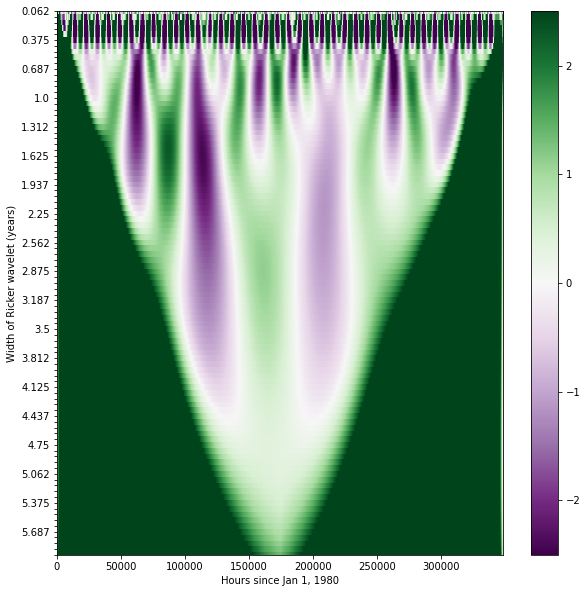

In [7]:
widths = np.array([i*8760//16 for i in range(1, 16*6)])
print(widths)
cwtmatr = signal.cwt(dfw['wind CONUS'], signal.ricker, widths)
print(cwtmatr.shape)

# Don't trim this time, but place a min and max value on heatmap.
small=cwtmatr

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(small, cmap='PRGn', aspect='auto',
           vmax=2.5, vmin=-2.5)
cbar = ax.figure.colorbar(im)

ax.set_xlabel('Hours since Jan 1, 1980')
ax.set_ylabel('Width of Ricker wavelet (years)')
y_labs = []
for i, w in enumerate(widths):
    y_labs.append(f'{round(w/8760,3)}') if i%5==0 else y_labs.append('') 
plt.yticks(range(len(widths)), y_labs)
plt.show()